In [1]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#dataset
path = '/Users/kpaul/OneDrive/code/github/Project/data_analysis/car/autos.csv'
df = pd.read_csv(path, encoding='latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [4]:
df.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

In [5]:
df2 = df.copy()
df2 = df2.dropna(axis= 0)
df2.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
yearOfCreation         0
yearCrawled            0
monthOfCreation        0
monthCrawled           0
NoOfDaysOnline         0
NoOfHrsOnline          0
yearsOld               0
monthsOld              0
dtype: int64

In [6]:
from itertools import groupby


x = df2['yearOfRegistration']
y = df2["name"].count()

df2.groupby("yearOfRegistration")[['name']].count()


,name
yearOfRegistration,
1910,98
1915,1
1919,1
1923,2
1925,1
...,...
2012,3713
2013,1762
2014,984


## Distribuição de Veículos com base no Ano de Registro

C:\Users\kpaul\AppData\Local\Temp\ipykernel_15576\82720107.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['yearOfRegistration'], bins=20)


Text(0.5, 1.0, 'Distribução de veículos com base no Ano de Registro')

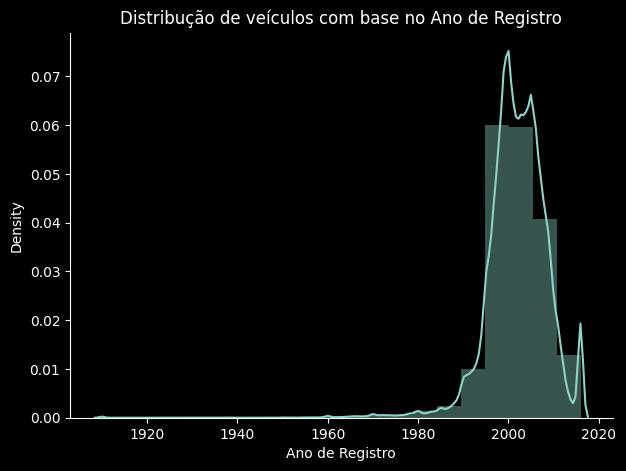

In [7]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(df2['yearOfRegistration'], bins=20)
plt.xlabel('Ano de Registro')
plt.title('Distribução de veículos com base no Ano de Registro')

## Variação da faixa de preço pelo tipo de veículo

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

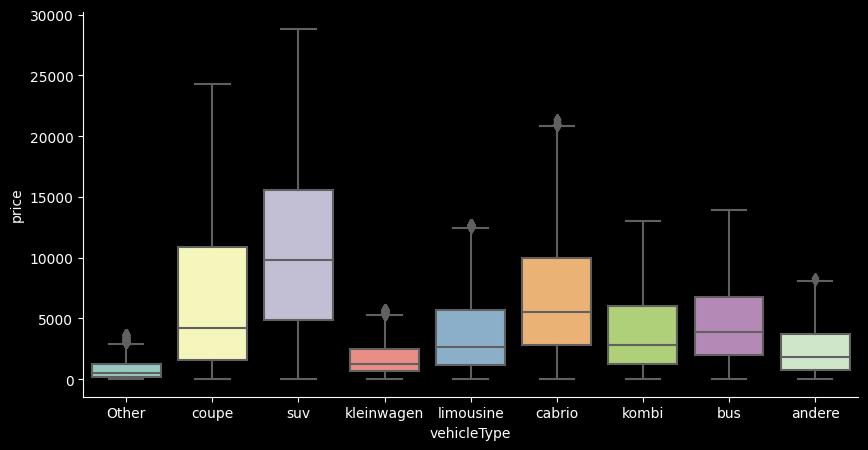

In [8]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.boxplot(data = df2, x= df2['vehicleType'], y=df2['price'])

## Contagem total de veículos à venda conforme o tipo de veículo

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

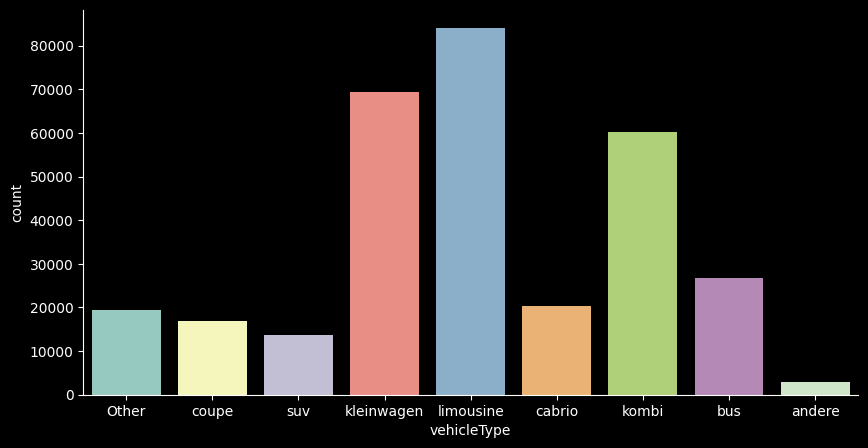

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.countplot(x=df2["vehicleType"])

## Número de veículos pertencentes a cada marca

In [10]:
df2['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'mazda',
       'nissan', 'ford', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'hyundai', 'sonstige_autos',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'citroen', 'toyota', 'chevrolet', 'dacia', 'daihatsu',
       'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'porsche',
       'rover', 'land_rover', 'lada'], dtype=object)

Text(0.5, 1.0, 'Veículo por marca')

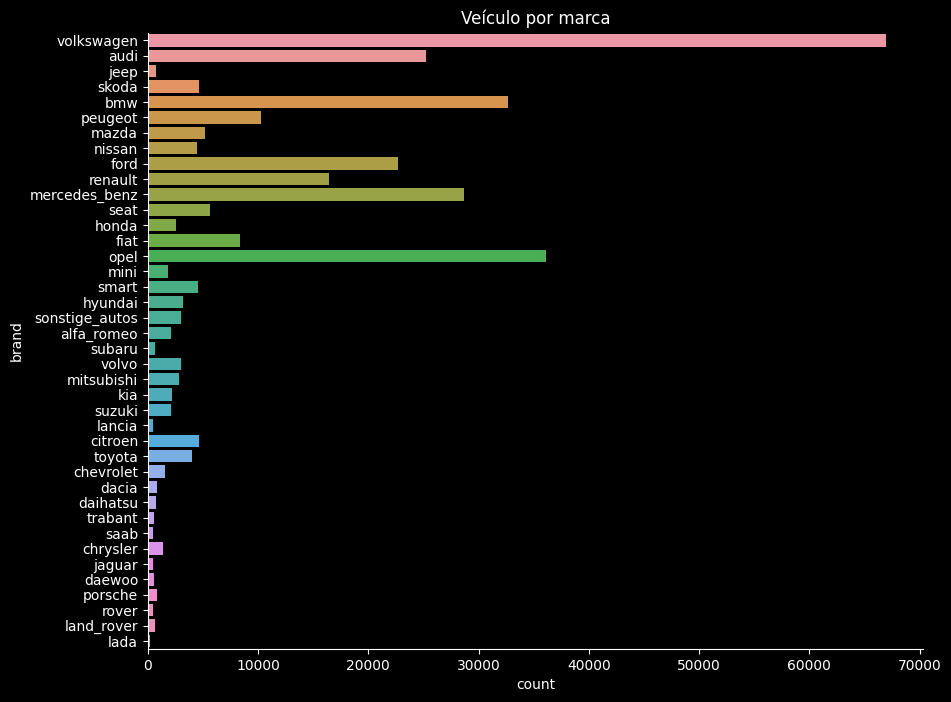

In [11]:
f, ax = plt.subplots(figsize=(10, 8))

sns.despine(f)
sns.countplot(y= df2['brand'])
plt.title('Veículo por marca')

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

<AxesSubplot:xlabel='fuelType', ylabel='price'>

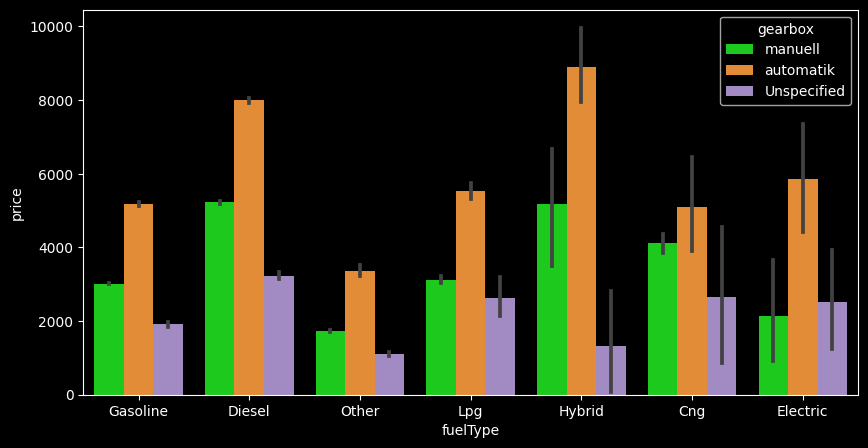

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(
    data=df2,
    x="fuelType", y='price', hue="gearbox",
    palette= colors
)

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

<AxesSubplot:xlabel='vehicleType', ylabel='powerPS'>

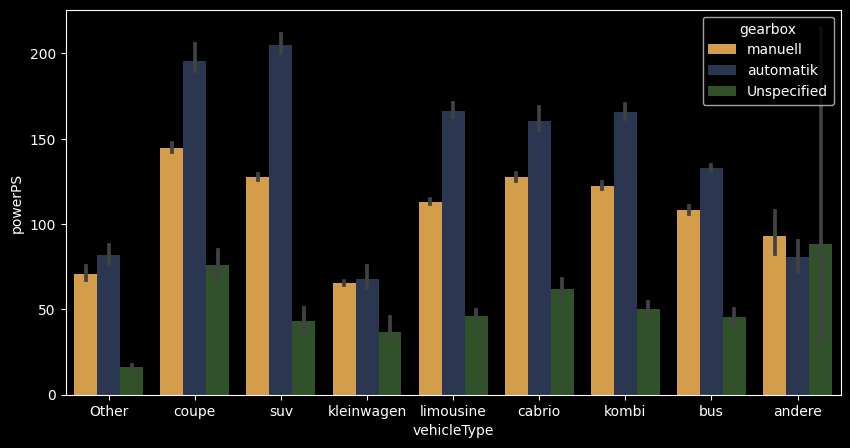

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
colors = ["#eba134", "#253457","#2d5725"]
sns.barplot(
    data=df2,
    x="vehicleType", y='powerPS', hue="gearbox",
    palette= colors
)

In [29]:
# Calcule a média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

#copy from datascience academy notebook

C:\Users\kpaul\AppData\Local\Temp\ipykernel_15576\1597621601.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
C:\Users\kpaul\AppData\Local\Temp\ipykernel_15576\1597621601.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
C:\Users\kpaul\AppData\Local\Temp\ipykernel_15576\1597621601.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
C:\Users\kpaul\AppData\Local\Temp\ipykernel_15576\1597621601.py:6: FutureWarning: The frame.append method is deprecate

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

C:\Users\kpaul\AppData\Local\Temp\ipykernel_15576\2065802811.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  tri = trial.pivot("brand","vehicleType", "avgPrice")


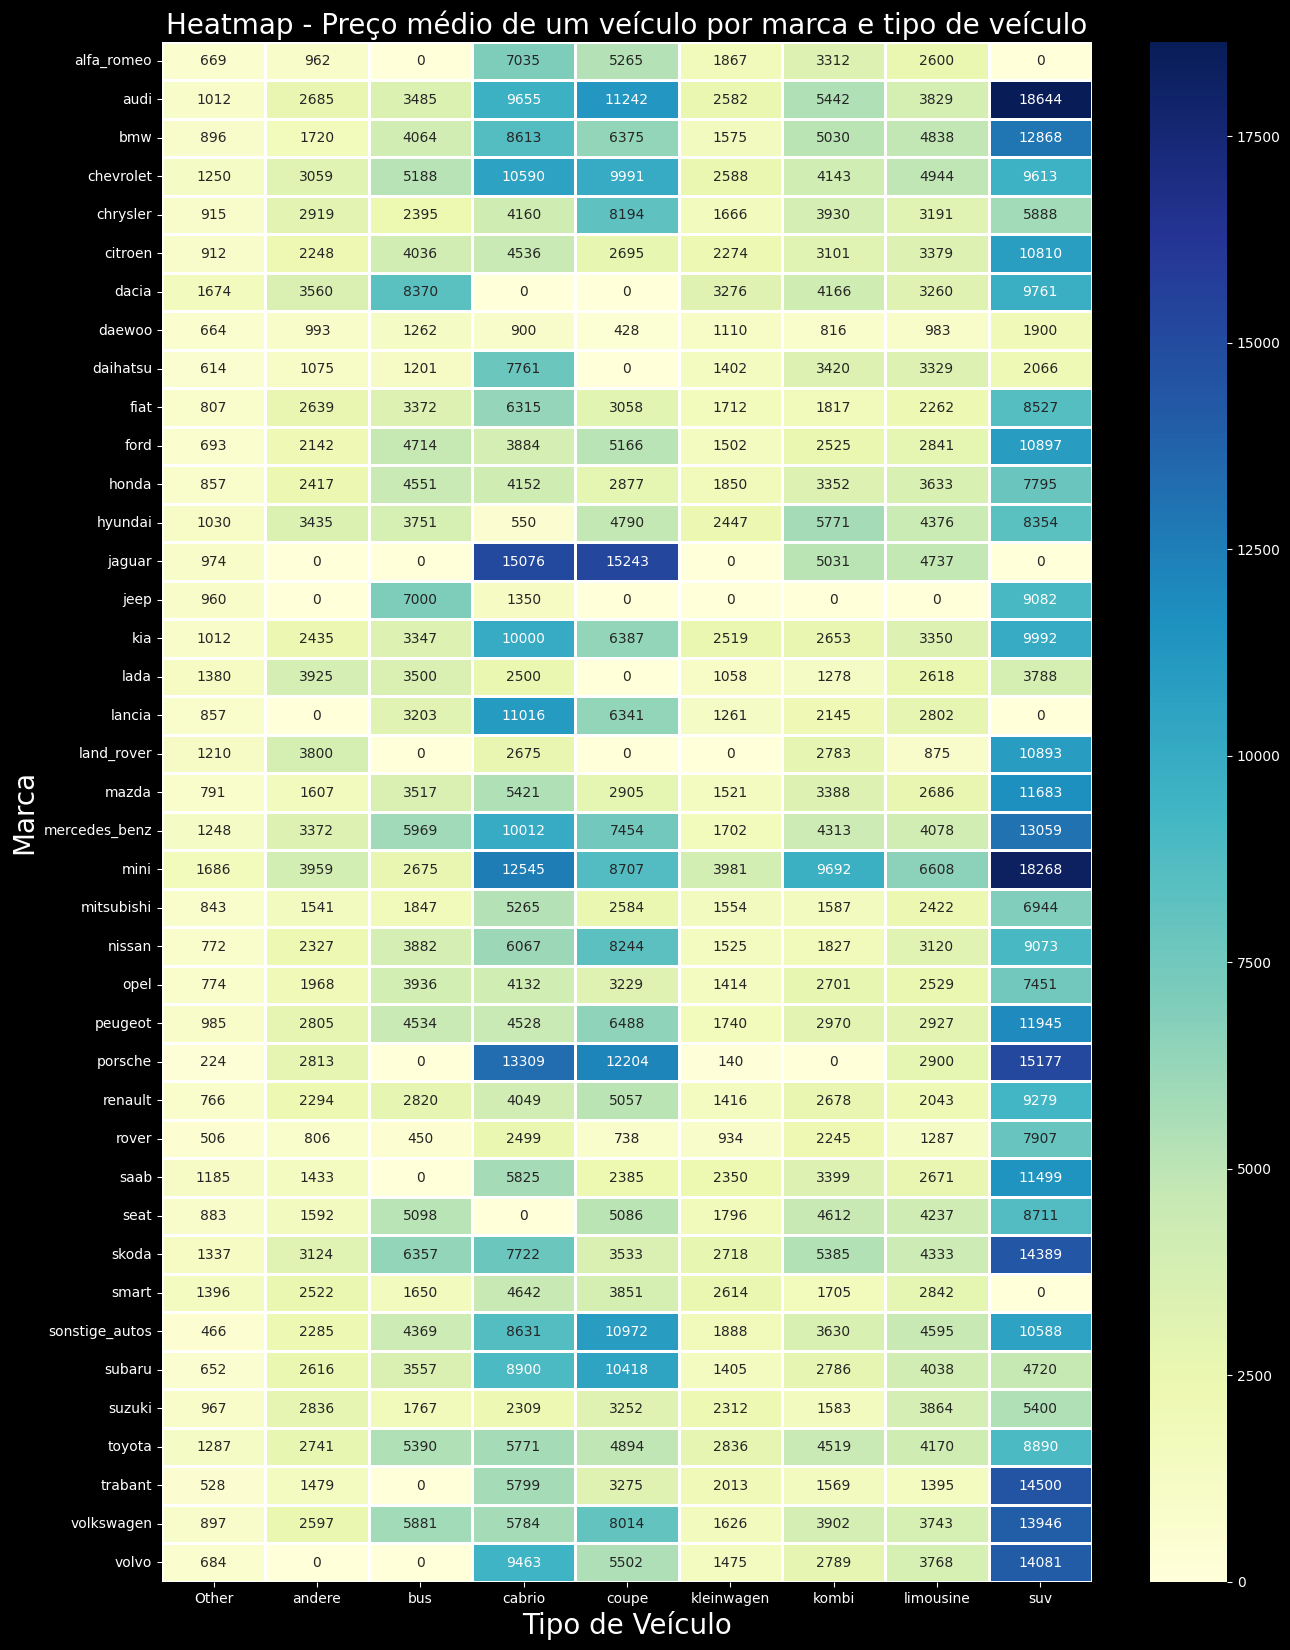

In [31]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()


#copy from datascience academy notebook